
# Week 6 Principal Component Analysis
Proprietary material - Under Creative Commons 4.0 licence CC-BY-NC https://creativecommons.org/licenses/by-nc/4.0/legalcode

# Tutorial Overview
Hi everyone! Welcome to the week 6 Lab - Dimensionality reduction using PCA!

In the lecture and previous labs, we went through the basics of KNNs and Pandas. You should now be able to work through the following: 

     1) Using dimensionality reduction on toy datasets

     2) Applying what you learned on the MNIST dataset

     3) Speeding up the performance of your models!


Here, you will get a more detailed and rich introduction!

***New!***
In this tutorial, you will learn and get practice on:
- Using SciKit learn to manipulate datasets
- Deciding how much accuracy you need (when to use PCA)
- Principal Component Analysis
- More practice with KNNs




**Tips to get the most out of this tutorial:**
1. Make sure you carefully read and understand how the example code works.  
2. Try your best before looking at the hidden solutions








# Using dimensionality reduction on Toy Datasets.

In this section we'll take a look at a dataset we haven't seen before: The IRIS dataset. This is a labelled dataset that has 4 features for each datapoint. It stores the sepal length in cm for a flower, the sepal width in cm, the petal length in cm, and the petal width in cm. It also has a label telling us which flower this data point is for. There are 3 possible classes (i.e. types of flowers) represented in this data set: Iris Setosa, Iris Versiclolour, and Iris Virgnica. There are 150 samples (datapoints) in this dataset. First, we'll import the dataset.

In [ ]:
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

# Take a look at the first few datapoints to get a sense of what it looks like:
print(df.head())

Next, you'll recall that in order to perform Principal Component Analysis (PCA), we need to apply standardization first. Standardization will ensure that each feature has a mean of 0 and a variance of 1. We can use a sklearn class to do this:

In [ ]:
from sklearn.preprocessing import StandardScaler

features = ['sepal length', 'sepal width', 'petal length', 'petal width']

# Separating out the features
x = df.loc[:, features].values

# Separating out the target
y = df.loc[:,['target']].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

# StandardScaler().fit_transform returns numpy arrays, not pandas dataframes

print(x[0:10]) # printing the first 10 rows of the standardized features 

Now that we've standardized our data, we can apply PCA to reduce the dimension. Since our data is currently 4 dimensional (since each input has 4 features), we can reduce our data down to either 3, 2, or 1 dimensions. We'll take a look at 3 and 2.

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])



# We are now adding the labels into the data matrix so that we have one 
# dataframe with all our information for graphing. 
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

Notice that we've set the columns to be 'principal component 1' and 'principal component 2'. This is a very arbitrary choice of naming, and for good reason: Once we've reduced the dimensionality, we lose the inhereint meaning of the original feature names (petal length, petal width, etc). So now that we've reduced our data to have 2 features, we don't really know *exactly* what these two features represent.

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b'] # 3 colors for the 3 types of Iris

for target, color in zip(targets,colors):
    # indicesToKeep generates a matrix of True and False values, where True
    # indicates the data point is of class target (see line 10), and False
    # indicates it is not.
    indicesToKeep = finalDf['target'] == target

    # TODO: Generate a scatter plot
    
    ax.scatter(# Insert arguments here!)

    # See the documentation on matplotlib.pyplot.scatter for more info:
    # https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.scatter.html
    
ax.legend(targets)
ax.grid()

In [ ]:
#@title Solution (Double Click To See)
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b'] # 3 colors for the 3 types of Iris

for target, color in zip(targets,colors):
    # indicesToKeep generates a matrix of True and False values, where True
    # indicates the data point is of class target (see line 10), and False
    # indicates it is not.
    indicesToKeep = finalDf['target'] == target

    # Generate a scatter plot
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color)
    
ax.legend(targets)
ax.grid()

As you can see, our Principal Components got a lot of important information! We can see that even though we started with 4 dimensional data, we reduced it down to 2 and there is still clear distinction between the different classes (less so with green and blue, but still they are somewhat separated).

Now we'll take a look at doing the same thing, but instead of getting 2 Principal Components, we'll do 3.

In [ ]:
pca = PCA(n_components=3)

principalComponents_3D = pca.fit_transform(x)

principalDf_3D = pd.DataFrame(data = principalComponents_3D
             , columns = ['principal component 1', 'principal component 2', 
                          'principal component 3'])



# We are now adding the labels into the data matrix so that we have one 
# dataframe with all our information for graphing. 
finalDf_3D = pd.concat([principalDf_3D, df[['target']]], axis = 1)

Now to plot:

In [ ]:
fig = plt.figure(figsize = (8,8))

# Notice that we can create a subplot that is 3 dimensional, using the 
# projection parameter:
ax = fig.add_subplot(1,1,1, projection='3d') 



ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('3 component PCA', fontsize = 15)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b'] # 3 colors for the 3 types of Iris

for target, color in zip(targets,colors):
    # indicesToKeep generates a matrix of True and False values, where True
    # indicates the data point is of class target (see line 10), and False
    # indicates it is not.
    indicesToKeep = finalDf['target'] == target

    # TODO: Generate a scatter plot
    ax.scatter(# Put your parameters here!)
    
ax.legend(targets)
ax.grid()

In [ ]:
#@title Solution (Double Click To See)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1, projection='3d') 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('3 component PCA', fontsize = 15)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b'] # 3 colors for the 3 types of Iris

for target, color in zip(targets,colors):
    # indicesToKeep generates a matrix of True and False values, where True
    # indicates the data point is of class target (see line 10), and False
    # indicates it is not.
    indicesToKeep = finalDf['target'] == target

    # Generate a scatter plot
    ax.scatter(finalDf_3D.loc[indicesToKeep, 'principal component 1']
               , finalDf_3D.loc[indicesToKeep, 'principal component 2']
               , finalDf_3D.loc[indicesToKeep, 'principal component 3']
               , c = color)
    
ax.legend(targets)
ax.grid()

Here it looks a bit messier. Judging strictly on our visual understanding of each graph we've seen, we'd likely try 2 principal components when working with a model, since it looks like the different classes are separated more clearly. But trying 3 certainly wouldn't hurt, as there's potential that the performance could be better.

# Applying what you've learned on the MNIST dataset
We'll be using the MNIST dataset once again (just like last week), but this time the dataset will be larger, and the images will be of higher resolution.

- SciKit Learn provides a dataset of handwritten digits (28*28 pixels). We will be using PCA to reduce the dimensionality of this dataset.

- Once we start reducing dimensionality using these techniques, we can visualize the images to see how much data we lost.

Let's start! 


In [4]:
import pandas as pd
from sklearn.datasets import fetch_openml

[link text](https:// [link text](https://))

### Getting the MNIST data (28 * 28) 


In [3]:
# Loading the MNIST dataset
# This will likely take several seconds to load--don't worry!
mnist = fetch_openml('mnist_784')
# These are the images
mnist.data.shape


KeyboardInterrupt: ignored

In [ ]:
# These are the labels
mnist.target.shape

(70000,)

### Splitting our dataset

In [ ]:
from sklearn.model_selection import train_test_split

train_img, test_img, train_lbl, test_lbl = train_test_split(
    mnist.data, mnist.target, test_size=1/7.0, random_state=0)

In [ ]:
# training images
print(train_img.shape)
# training labels
print(train_lbl.shape)
# test images
print(test_img.shape)
# test labels
print(test_lbl.shape)


(60000, 784)
(60000,)
(10000, 784)
(10000,)


Let's move on to using the KNN model we discussed in last week's lecture and lab. Use what you learned last week to implement the model. Afterwards we will use PCA to compare how fast the models train!

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import os
# Use what you learned last week to instantiate, train, and predict using the KNN 
# Then, calculate the model's accuracy
# Note: Since we are not using PCA here, this will likely take ~1 minute to 
# compute all of the predictions.

start_time = os.times()[0]
count = 0

# TODO:
knn_model = KNeighborsClassifier()


end_time = os.times()[0]

# Prints the percentage of predictions that were correct
print('Time spent(without PCA): ', end_time-start_time)
print('Accuracy: ', count/len(predictions))


In [ ]:
#@title Solution (Double click to see)
# SOLUTION
# Feel free to tinker with the n_neighbors value. There isn't a 'right' value 
# for K here, like there clearly was in K means for this problem

start_time = os.times()[0]

knn_model.fit(train_img, train_lbl)

predictions = knn_model.predict(test_img)
count = 0
for i in range(len(predictions)):
  if predictions[i] == test_lbl[i]:
    count += 1

end_time = os.times()[0]

# Prints the percentage of predictions that were correct
print('Time spent(without PCA): ', end_time-start_time)
print('Accuracy: ', count/len(predictions))

Time spent(without PCA):  69.0
Accuracy:  0.9466


#KNN with sklearn after PCA
In this section we'll compare the effects of principle component analysis on a dataset we've already seen before: mnist.

Our first step is to standardize our dataset; standardization is the transformation of data to a standard scale( from 0 to 1), which makes sure that the features with large values don't dominate our predictions (for more on this refer back to the slides for this week).

PCA is a variance maximizing exercise, meaning standardization is really important! As such, you need to scale features in the MNIST dataset before applying PCA.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# fitting on training set.
scaler.fit(train_img)

# applying transformation on both the train and test image set
train_img = scaler.transform(train_img)
test_img = scaler.transform(test_img)

Now, we'll instantiate PCA. The 0.95 for the number of components tells scikit learn to choose the minimum number of components so that 95% of the variance is explained by them. This is much easier than manually trying different values, as we did with the Iris dataset!

In [ ]:
from sklearn.decomposition import PCA
# Make an instance of the PCA model
pca = PCA(.95)

In [ ]:
# fitting on the train dataset
pca.fit(train_img)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
# these are the components of the PCA model
pca.n_components_

327

In [ ]:
# using the PCA model to transform both the training and test data
pca_train_img = pca.transform(train_img)
pca_test_img = pca.transform(test_img)

We can go from a compressed representation (327 components) back to an approximation of the original high dimensional data (784 components).

In [ ]:
approximation = pca.inverse_transform(pca_train_img)

In [ ]:
approximation[0]

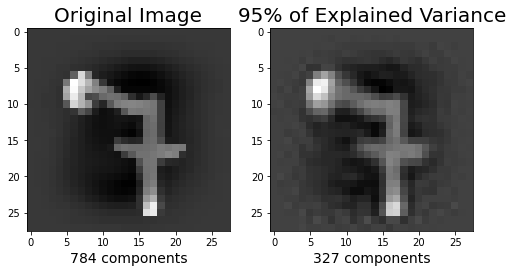

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4));
# Original Image
plt.subplot(1, 2, 1);
plt.imshow(train_img[0].reshape(28,28),
              cmap = plt.cm.gray, interpolation='nearest');
plt.xlabel('784 components', fontsize = 14)
plt.title('Original Image', fontsize = 20);

# 154 principal components
plt.subplot(1, 2, 2);
plt.imshow(approximation[
                         0].reshape(28, 28),
              cmap = plt.cm.gray, interpolation='nearest');
plt.xlabel('327 components', fontsize = 14)
plt.title('95% of Explained Variance', fontsize = 20);

An important factor to consider is that we already scaled are images, so the pixel values are very skewed. That's why both of our images look a bit washed out.

In [ ]:
# Again, feel free to tinker with the n_neighbors value. 
start_time = os.times()[0]

knn_model = KNeighborsClassifier(n_neighbors=5, algorithm="brute")

knn_model.fit(pca_train_img, train_lbl)

predictions = knn_model.predict(pca_test_img)
count = 0
for i in range(len(predictions)):
  if predictions[i] == test_lbl[i]:
    count += 1

end_time = os.times()[0]

print('Time spent(without PCA): ', end_time-start_time)
# Prints the percentage of predictions that were correct
print('Accuracy: ', count/len(predictions))

Time spent(without PCA):  36.73999999999995
Accuracy:  0.9519


Using PCA reduced the time taken our model by almost half, this is just a glimpse of how PCA can help improve the efficiency of our model while also allowing us to visualise higher dimensional data in a more interpretable form.

However, just like everything PCA has its benefits as well as some shortcomings and it's up to you to make a trade off between the accuracy and the efficiency of your model. For more on this check out the link in resources.

In [ ]:
# Try different distance metrics, and see which one performs best!

new_knn = KNeighborsClassifier(metric=)

new_knn.fit(X_test, y_test)
predictions = new_knn.predict(X_test)


# Accuracy code copied from above for convenience
count = 0
for i in range(len(predictions)):
  if predictions[i] == y_test[i]:
    count += 1


# Prints the percentage of predictions that were correct
print('Accuracy: ', count/len(predictions))

# References

https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html

https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

https://archive.ics.uci.edu/ml/datasets/iris

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html

https://matplotlib.org/3.1.1/gallery/mplot3d/scatter3d.html

